Restarted .venv (Python 3.11.3)

## Multi Touch Attribution

In [1]:
#Importing relevant libraries
import pandas as pd
from marketing_attribution_models import MAM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/pcb_subset_2contacts.csv")

In [3]:
df.head()

,customer_id,path,conversion
0,10028,Search Ads > Display Ads,1
1,10045,Search Ads > Display Ads,1
2,10062,Social Media > Direct Traffic > Email,1
3,10068,Search Ads > Social Media > Social Media > Sea...,1
4,10095,Display Ads > Email > Referral > Display Ads >...,1


In [5]:
# Copy the data frame
df_copy = df.copy()

# MAM initialisieren ohne Zeit-Grouping
attributions = MAM(
    df_copy,
    channels_colname="path",                       # deine Journey-Strings
    journey_with_conv_colname="conversion",        # 0/1-Flag
    group_channels=False,                          # KEINE Zeit-Sortierung, voraggregierte „path“-Strings
    create_journey_id_based_on_conversion=True
)

In [7]:
# Different Attribution Models
first_df, _  = attributions.attribution_first_click()
last_df, _   = attributions.attribution_last_click()
linear_df, _ = attributions.attribution_linear()
position_decay_df, _ = attributions.attribution_position_decay()
position_based_df, _ = attributions.attribution_position_based(list_positions_first_middle_last=[0.3, 0.3, 0.4])
markov_df, *_ = attributions.attribution_markov()

In [8]:
attributions.data_frame

,channels_agg,converted_agg,conversion_value,time_till_conv_agg,attribution_markov_algorithmic,attribution_first_click_heuristic,attribution_last_click_heuristic,attribution_linear_heuristic,attribution_position_decay_heuristic,attribution_position_based_0.3_0.3_0.4_heuristic
0,Search Ads > Display Ads,1,1,24 > 0,0.4928219711333659 > 0.507178028866634,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
1,Search Ads > Display Ads,1,1,24 > 0,0.4928219711333659 > 0.507178028866634,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
2,Social Media > Direct Traffic > Email,1,1,48 > 24 > 0,0.32938806270518195 > 0.3406010251746707 > 0.3...,1 > 0 > 0,0 > 0 > 1,0.3333333333333333 > 0.3333333333333333 > 0.33...,0.16666666666666666 > 0.3333333333333333 > 0.5,0.3 > 0.3 > 0.4
3,Search Ads > Social Media > Social Media > Sea...,1,1,96 > 72 > 48 > 24 > 0,0.19835879213946264 > 0.20109413857369157 > 0....,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
4,Display Ads > Email > Referral > Display Ads >...,1,1,120 > 96 > 72 > 48 > 24 > 0,0.1673712222418501 > 0.16518812327017698 > 0.1...,1 > 0 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 0 > 1,0.16666666666666666 > 0.16666666666666666 > 0....,0.047619047619047616 > 0.09523809523809523 > 0...,0.3 > 0.075 > 0.075 > 0.075 > 0.075 > 0.4
...,...,...,...,...,...,...,...,...,...,...
2499,Display Ads > Social Media > Search Ads > Refe...,1,1,96 > 72 > 48 > 24 > 0,0.201947150912105 > 0.19893688686434055 > 0.19...,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
2500,Email > Direct Traffic > Direct Traffic > Sear...,1,1,96 > 72 > 48 > 24 > 0,0.19755302094852914 > 0.20389253503509935 > 0....,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
2501,Referral > Search Ads,1,1,24 > 0,0.5091809385832535 > 0.4908190614167464,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
2502,Display Ads > Referral > Display Ads > Direct ...,1,1,120 > 96 > 72 > 48 > 24 > 0,0.16541769885218763 > 0.1667486481036624 > 0.1...,1 > 0 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 0 > 1,0.16666666666666666 > 0.16666666666666666 > 0....,0.047619047619047616 > 0.09523809523809523 > 0...,0.3 > 0.075 > 0.075 > 0.075 > 0.075 > 0.4


In [9]:
attributions.group_by_channels_models

,channels,attribution_markov_algorithmic_x,attribution_first_click_heuristic,attribution_last_click_heuristic,attribution_linear_heuristic,attribution_position_decay_heuristic,attribution_position_based_0.3_0.3_0.4_heuristic,attribution_markov_algorithmic_y
0,Direct Traffic,376.029987,382,396,379.276551,381.585204,382.863690,376.029987
1,Display Ads,369.153336,391,364,370.156169,365.375330,372.878810,369.153336
2,Email,364.338301,351,370,364.716775,369.054878,362.345357,364.338301
3,Referral,372.123540,380,356,370.704942,365.125824,368.733810,372.123540
4,Search Ads,358.704172,340,364,350.541847,354.222300,352.609762,358.704172
5,Social Media,363.650664,360,354,368.603716,368.636464,364.568571,363.650664


In [10]:
attributions.group_by_channels_models
# as we don't have conversion values, we only keep the conversion count columns
cols = ["channels",
        "attribution_first_click_heuristic",
        "attribution_last_click_heuristic",
        "attribution_linear_heuristic",
        "attribution_position_decay_heuristic",
        "attribution_position_based_0.3_0.3_0.4_heuristic",
        "attribution_markov_algorithmic_x"]
df_clean = attributions.group_by_channels_models[cols]
# Renaming columns
df_clean.columns = ["channel", "first_touch", "last_touch", "linear", "position_decay", "position_based", "markov"]
df_clean

,channel,first_touch,last_touch,linear,position_decay,position_based,markov
0,Direct Traffic,382,396,379.276551,381.585204,382.863690,376.029987
1,Display Ads,391,364,370.156169,365.375330,372.878810,369.153336
2,Email,351,370,364.716775,369.054878,362.345357,364.338301
3,Referral,380,356,370.704942,365.125824,368.733810,372.123540
4,Search Ads,340,364,350.541847,354.222300,352.609762,358.704172
5,Social Media,360,354,368.603716,368.636464,364.568571,363.650664


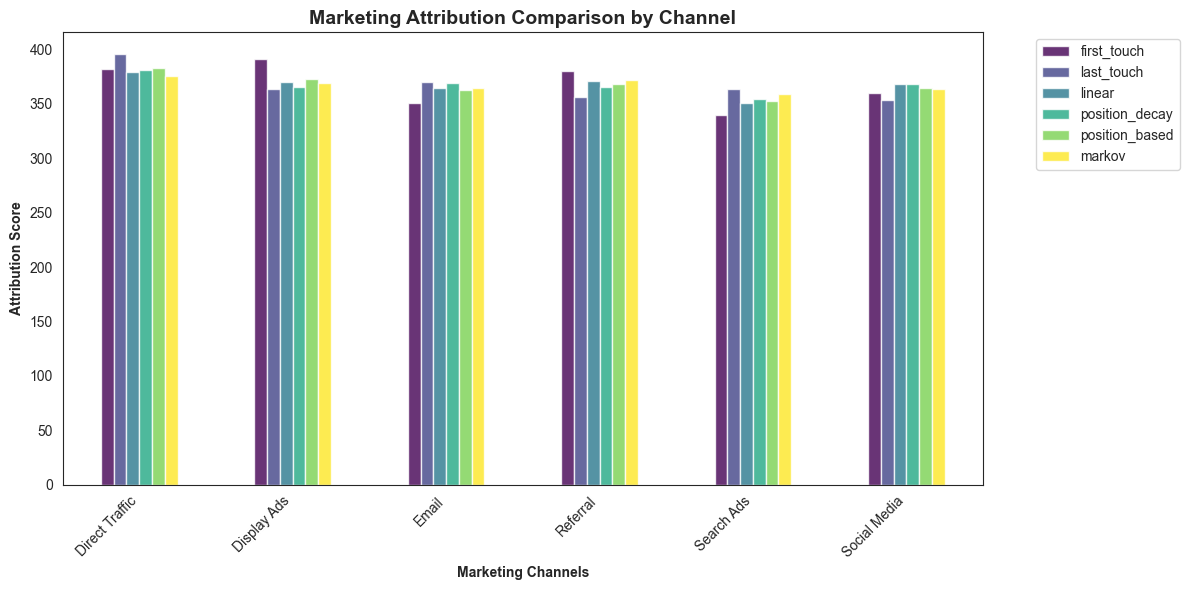

In [11]:
# Einfache Version - nur gruppiertes Balkendiagramm
df_clean.set_index('channel').plot(kind='bar', 
                                   figsize=(12, 6), 
                                   colormap='viridis',
                                   alpha=0.8)
plt.title('Marketing Attribution Comparison by Channel', fontsize=14, fontweight='bold')
plt.xlabel('Marketing Channels', fontweight='bold')
plt.ylabel('Attribution Score', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

After excluding the Customer Journeys with only one contact we have slightly more variation in the channel attribution, but still the channels deliver very equally distributed results.